## Working with Strax

A tutorial by Chloe Liebenthal (Rice University Astroparticle Group), November 2020

### Introduction

This tutorial covers the **terminology we use** in our search for dark matter, the basics of **how our experiment operates**, an **introduction to the straxen software**, and some **sample plots** with tutorials on how they were created. By the end of this tutorial, you'll learn how to make your own plots as well. 

### What is dark matter?

Dark matter is a form of matter that makes up about 85% of the universe. However, because it doesn't interact with electromagnetic radiation like most matter does, it is very difficult to detect. We know it's out there because of various astrophysical calculations; if we assume that dark matter is out there in the universe, affecting normal particles via gravity, that would account for a lot of problems we have calculating things like the rate of expansion of the universe.

A common theory about dark matter is that it exists in the form of WIMPs, or weakly-interacting massive particles. WIMPs would have a large mass, compared to most particles, and they would only be able to interact with other particles via gravity and weak nuclear force. The XENON collaboration uses a time projection chamber to search for WIMPs.

### What is a time projection chamber, and how does it search for dark matter?

![Diagram of a TPC](https://upload.wikimedia.org/wikipedia/commons/d/d2/2phaseTPC_b.jpg)


A time projection chamber is a type of particle detector. It consists of a vat of liquid or gas, with lots of detectors (called photomultiplier tubes, or PMTs) arranged on either side. In our XENON experiments, we use liquid xenon inside the detector with a gas layer on top. There is also an electric field throughout the whole detector. When a particle floating by interacts with the particles in the xenon, it causes a flash of light called **scintillation**, which releases particles called photons. A WIMP would be able to cause such a particle interaction because of the gravitational pull it would exert on the xenon particles. The PMTs are able to see these photons and record them. We call this the **S1 signal**.

When a particle interaction occurs, it knocks some electrons loose in a process called **ionization**, and the electric field accelerates them and makes them float up towards the top of the detector. Accelerating the electrons also causes another scintillation, which the PMTs also record. This is the **S2 signal**.

The reason why it's useful to record both S1 and S2 signals is that it enables us to find out how close to the top or bottom of the detector the particle that interacted with the xenon was. For reference, we will refer to 'up and down' as the z-axis. When an electron is drifting in liquid xenon, we know what its velocity will be. So if we have both the S1 and the S2, we can use the time delay between them to figure out how far down at the bottom the electron was when the interaction event took place. 

We can also figure out where the interaction was with reference to the x-y plane. Because there will be multiple PMTs that pick up photons from the scintillation, we can compare how many photons each one saw to determine which PMT the interaction was underneath.

Knowing where an event took place is necessary because it allows for a **fiducial cross section** of the place in the detector where the event happened. What that means is that we can determine what conditions at the detector were like in that place when the interaction happened, including how many background events (ie interactions with particles that aren't relevant to our experiment) take place there. This way, we can figure out if the event is background noise or something we should look into further.

## Working with Strax
### What is strax?

Strax is a python package used to analyze data from TPC (time projection chamber) dark matter detectors that use noble liquids. For analysis tools specific to the XENONnT detector, you can use the Straxen framework, which builds on Strax. A lot of how strax and straxen work involves dataframes, which are a way of storing data in the form of a table. Dataframes are created by plugins, which are algorithms that take sets of data and turn them into dataframes.

If you'd like to install strax and straxen in your own Jupyter notebook, you can copy and run the following code:

In [ ]:
!pip install -I strax==0.12.2 straxen==0.11.0 -q
!pip install -I strax==0.12.2 straxen==0.11.0 -q --user

We're going to need to import those modules now that we've installed them to make them available. To import a module into python, you just need to write 'import (the name of the module)'. If you want to change the module's name, you can write 'import (the name of the module) as (what you're renaming the module to)'.

pandas is a module that's very useful for working with dataframes. We're going to import that as well, and rename it 'pd' because it's quicker to type.

In [5]:
import straxen
import strax
import pandas as pd

First, we'll activate the XENON1T context. This means that we're telling the strax software to specifically look at data and information from XENON1T. A strax context provides information on how to process data, such as what plugins to use and how to read the data.

In [7]:
st = straxen.contexts.xenon1t_dali()

Let's start out by making a plot that compares the respective areas of S1s and S2s. Comparing the areas is useful because it allows us to distinguish two different types of interactions- **electronic recoils** and **nuclear recoils**. 

An electronic recoil occurs when the particle interaction affects a xenon atom's electrons, whereas a nuclear recoil occurs when the particle interaction affects a xenon atom's nucleus. We can figure out how much energy was transferred during the interaction based on how big the S1s and S2s are. Since electronic recoils are expected to create a bigger S2 signal than a nuclear recoil, we can use the ratio of S2/S1 to distinguish between the two types of recoils. Electronic recoils are responsible for a lot of background noise in the detector, so being able to filter a lot of them out from nuclear recoils is really helpful.

Also, rather than plain data about the area of S1s and S2s, strax uses various techniques to clean up the data, resulting in 'corrected S1s' and 'corrected S2s'.

To start making our new cS2/cS1 plot, we're going to have to figure out what data type to load. A data type specifies what sorts of information is stored in a dataframe. We're looking for a data type that will give us information about cS1s and cS2s.

Fortunately, there is a useful search function we can use:

In [13]:
st.search_field('cs1')

cs1 is part of corrected_areas (provided by CorrectedAreas)
cs1 is part of event_info (provided by EventInfo)


It looks like there are two possible data types for us to look at to find out to find our cS1s and cS2s. Each one is provided by a different plugin- CorrectedAreas or EventInfo. Let's have a look at what each data each plugin can provide us with.

In [18]:
st.data_info('corrected_areas')

,Field name,Data type,Comment
0,cs1,float32,Corrected S1 area [PE]
1,cs2,float32,Corrected S2 area [PE]
2,alt_cs1,float32,Corrected area of the alternate S1 [PE]
3,alt_cs2,float32,Corrected area of the alternate S2 [PE]
4,time,int64,Start time since unix epoch [ns]
5,endtime,int64,Exclusive end time since unix epoch [ns]


In [19]:
st.data_info('event_info')

,Field name,Data type,Comment
0,cs1,float32,Corrected S1 area [PE]
1,cs2,float32,Corrected S2 area [PE]
2,alt_cs1,float32,Corrected area of the alternate S1 [PE]
3,alt_cs2,float32,Corrected area of the alternate S2 [PE]
4,time,int64,Start time since unix epoch [ns]
...,...,...,...
59,z_naive,float32,Interaction z-position using mean drift veloci...
60,r_naive,float32,Interaction r-position using observed S2 posit...
61,r_field_distortion_correction,float32,Correction added to r_naive for field distorti...
62,theta,float32,Interaction angular position (radians)


As we can see, event_info has a lot more data than corrected_area (64 rows of data compared to just 5!), so that's the plugin we're going to use. Next, we need to select a *run*, which is a term we use for a certain subset of data taken in a length of time. Let's look at which runs are available.

In [20]:
st.select_runs()

Checking data availability: 100%|██████████| 5/5 [01:36<00:00, 19.40s/it]


,name,number,start,reader.ini.name,trigger.events_built,end,tags,mode,livetime,peaklets_available,raw_records_available,records_available,event_info_available,events_available
0,170204_1410,6786,2017-02-04 14:10:08+00:00,background_stable,19574,2017-02-04 15:10:13+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,0 days 01:00:05,True,True,True,True,True
1,170204_1510,6787,2017-02-04 15:10:28+00:00,background_stable,19634,2017-02-04 16:10:32+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,0 days 01:00:04,True,True,True,True,True
2,170204_1610,6788,2017-02-04 16:10:39+00:00,background_stable,19400,2017-02-04 17:10:43+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,0 days 01:00:04,True,True,True,True,True
3,170204_1710,6789,2017-02-04 17:10:51+00:00,background_stable,19415,2017-02-04 18:10:54+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,0 days 01:00:03,True,True,True,True,True
4,170204_1810,6790,2017-02-04 18:11:01+00:00,background_stable,19671,2017-02-04 19:11:05+00:00,"blinded,_sciencerun1_candidate,_sciencerun1",background_stable,0 days 01:00:04,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,181027_2044,23315,2018-10-27 20:44:21+00:00,ar37_stable,36496,2018-10-27 21:44:25+00:00,"Kr83m,_sciencerun2_candidate,_sciencerun2_prel...",ar37_stable,0 days 01:00:04,True,True,True,True,True
212,181027_2144,23316,2018-10-27 21:44:33+00:00,ar37_stable,36330,2018-10-27 22:44:35+00:00,"Kr83m,_sciencerun2_candidate,_sciencerun2_prel...",ar37_stable,0 days 01:00:02,True,True,True,True,True
213,181027_2244,23317,2018-10-27 22:44:43+00:00,ar37_stable,36486,2018-10-27 23:44:47+00:00,"Kr83m,_sciencerun2_candidate,_sciencerun2_prel...",ar37_stable,0 days 01:00:04,True,True,True,True,True
214,181027_2344,23318,2018-10-27 23:44:59+00:00,ar37_stable,36777,2018-10-28 00:45:03+00:00,"Kr83m,_sciencerun2_candidate,_sciencerun2_prel...",ar37_stable,0 days 01:00:04,True,True,True,True,True


We've got a lot of different runs to choose from. For the purposes of this tutorial, I'm going to load up the run identified by '180215_1029'. We'll do this by setting it as a variable to use in functions later.

In [22]:
run_id = '180215_1029'

To actually load data, we use the function get_df (which needs to know the run's ID number and what type of data we are looking for) to get a dataframe created with pandas, which is what we imported earlier. You can also use a different module called numpy, but we're going to use pandas for now because it's very straightforward.

In [23]:
df = st.get_df(run_id, 'event_info')

If we want to look directly at the 'df' dataframe we just created with all our data in it, the function print(df) will print it out to read. However, it won't mean much to us in its current form- we'll make a data plot so we can visually analyze the data.

In [25]:
print(df)

             cs1            cs2     alt_cs1        alt_cs2  \
0    3154.413574  652438.812500    0.000000     176.090179   
1    5758.058105  568073.625000  141.350296  337445.968750   
2    1435.035889   82255.000000    0.000000    6068.285645   
3    1345.859131  122233.304688    0.000000   19143.283203   
4    2126.204346  112584.046875    0.000000  104159.750000   
..           ...            ...         ...            ...   
302  3229.083496  259479.937500    0.000000  134938.968750   
303   946.592285   83970.125000    0.000000    3686.266846   
304     0.000000  283336.406250    0.000000   16599.048828   
305     0.000000  314465.031250    0.000000   17262.187500   
306     0.000000  104435.242188    0.000000   59934.355469   

                    time              endtime     e_light    e_charge  \
0    1518690592149882940  1518690592152169100  303.053741  286.338745   
1    1518690592201439770  1518690592203722050  553.193542  249.313004   
2    1518690592466567440  1518690592

Any run is full of *events*. Each time a new particle comes into the detector to cause an interaction, that's a new event. We are going to take every event in the run that we selected, and plot each one on the same plot to compare them to each other.

Another important module we use is matplotlib.pyplot, which is used to make plots. Because it also has an unwieldly name, we're going to rename it 'plt' instead. The plot.scatter function, which is formatted as df.plot.scatter(x-axis, y-axis) because we're using it on the dataframe represented by df, will immediately create a simple plot of every event. We're also going to use functions from matplotlib.pyplot to set log scales for the x- and y-axis, or all the data would just look like one big clump. We'll also set the x-axis to start at 1 and continue towards infinity, which will also make the plot more readable.

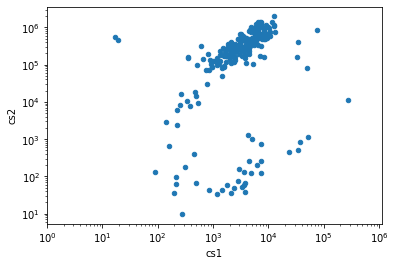

In [35]:
import matplotlib.pyplot as plt

df.plot.scatter('cs1', 'cs2')
plt.xscale('log')
plt.xlim(1, None)
plt.yscale('log')

That definitely shows our data, but doesn't tell us much about it. However, there's actually an easier way to make a cS2/cS1 chart from a given run. Because so many analysts want to compare cS1s and cS2s, straxen has a built-in function to let you make one instantly!

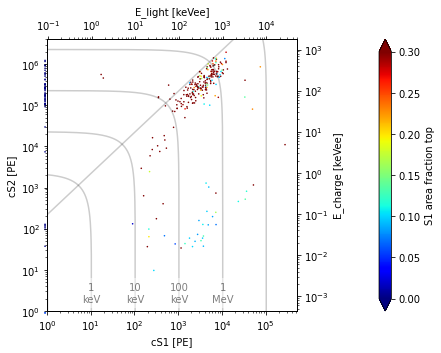

In [36]:
st.event_scatter(run_id)

In this plot, we can see that the total PMT area picking up the cS1 and S2 signals is measured in PE. The automatic plot also has axes that relate cS1 and cS2 area to the total amount of charge released in the interaction and the amount of light released in the interaction (measured in terms of electronvolts). The grey lines on the plot use these electronvolt values as benchmarks to indicate different energy ranges for how much recoil energy was introduced into the detector by the initial particle interaction; from this, we can see that mose events were on the scale of 100 keV or 1 MeV. 

Dots representing events are also color-coded by the value of the top of the S2/S1 fraction. Redder dots mean events with a higher ratio of S2 area to S1 area, so we know that those are more likely to be electronic recoils. 